In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kendalltau
import pickle
import plotly.express  as px 


# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from feature_engine.outliers import Winsorizer
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# model 
# model 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import  AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Data Loading

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('melb_data.csv')
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,2.0,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,1.0,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


## Eksplorasi Data Sederhana

In [3]:
df.duplicated().sum()

0

In [4]:
# Cek missing values
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [14]:
# Menghitung median dari kolom 'BuildingArea' dan modus dari kolom 'YearBuilt' dan 'CouncilArea'
median_building_area = df['BuildingArea'].median()
mode_year_built = df['YearBuilt'].mode()[0]  # [0] digunakan untuk mendapatkan nilai modus pertama jika ada beberapa nilai modus
mode_council_area = df['CouncilArea'].mode()[0]

# Mengganti nilai yang hilang dengan median dan modus
df['BuildingArea'].fillna(median_building_area, inplace=True)
df['YearBuilt'].fillna(mode_year_built, inplace=True)
df['CouncilArea'].fillna(mode_council_area, inplace=True)
df['Car'].fillna(0, inplace=True)

In [15]:
# Cek kembali missing values
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [16]:
# Mengganti datatype kolom `Bedroom2`, `Bathroom`, `Car`
df['Bedroom2']=df['Bedroom2'].astype(int)
df['Bathroom'] = df['Bathroom'].astype(int)
df['Car']=df['Car'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  int32  
 11  Bathroom       13580 non-null  int32  
 12  Car            13580 non-null  int32  
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

# Feature Engineering

## Analisis Cardinality

In [18]:
#Divide category columns into category_columns
category_columns = df[['Suburb', 'Address', 'Type', 'Regionname', 'Method', 'SellerG', 'CouncilArea']]

# Divide numeric columns into numeric_columns
numeric_columns = df[['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 
                'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
                'Longtitude', 'Propertycount']]

In [19]:
# Menampilkan categorical dataframe
category_columns.head()

,Suburb,Address,Type,Regionname,Method,SellerG,CouncilArea
0,Abbotsford,85 Turner St,h,Northern Metropolitan,S,Biggin,Yarra
1,Abbotsford,25 Bloomburg St,h,Northern Metropolitan,S,Biggin,Yarra
2,Abbotsford,5 Charles St,h,Northern Metropolitan,SP,Biggin,Yarra
3,Abbotsford,40 Federation La,h,Northern Metropolitan,PI,Biggin,Yarra
4,Abbotsford,55a Park St,h,Northern Metropolitan,VB,Nelson,Yarra


In [20]:
# Menampilkan categorical dataframe
numeric_columns.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2,1,1,202.0,126.0,1970.0,-37.7996,144.9984,4019.0
1,2,1035000.0,2.5,3067.0,2,1,0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,3,1465000.0,2.5,3067.0,3,2,0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
3,3,850000.0,2.5,3067.0,3,2,1,94.0,126.0,1970.0,-37.7969,144.9969,4019.0
4,4,1600000.0,2.5,3067.0,3,1,2,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


In [21]:
# Menghitung cardinality (jumlah nilai unik) dari setiap kolom
for i in category_columns.columns:
    print(f'cardinality kolom {i}:', category_columns[i].nunique())

cardinality kolom Suburb: 314
cardinality kolom Address: 13378
cardinality kolom Type: 3
cardinality kolom Regionname: 8
cardinality kolom Method: 5
cardinality kolom SellerG: 268
cardinality kolom CouncilArea: 33


## Feature Selection

In [22]:
# Membagi kolom kategorikal dan numerikal
cols_num = ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Lattitude', 'Longtitude', 'YearBuilt', 'Propertycount', 'Price']
cols_cat = ['Suburb', 'Type', 'Regionname', 'Method', 'SellerG', 'CouncilArea']

### Analysis Correlation

#### Numerical Column

<Axes: >

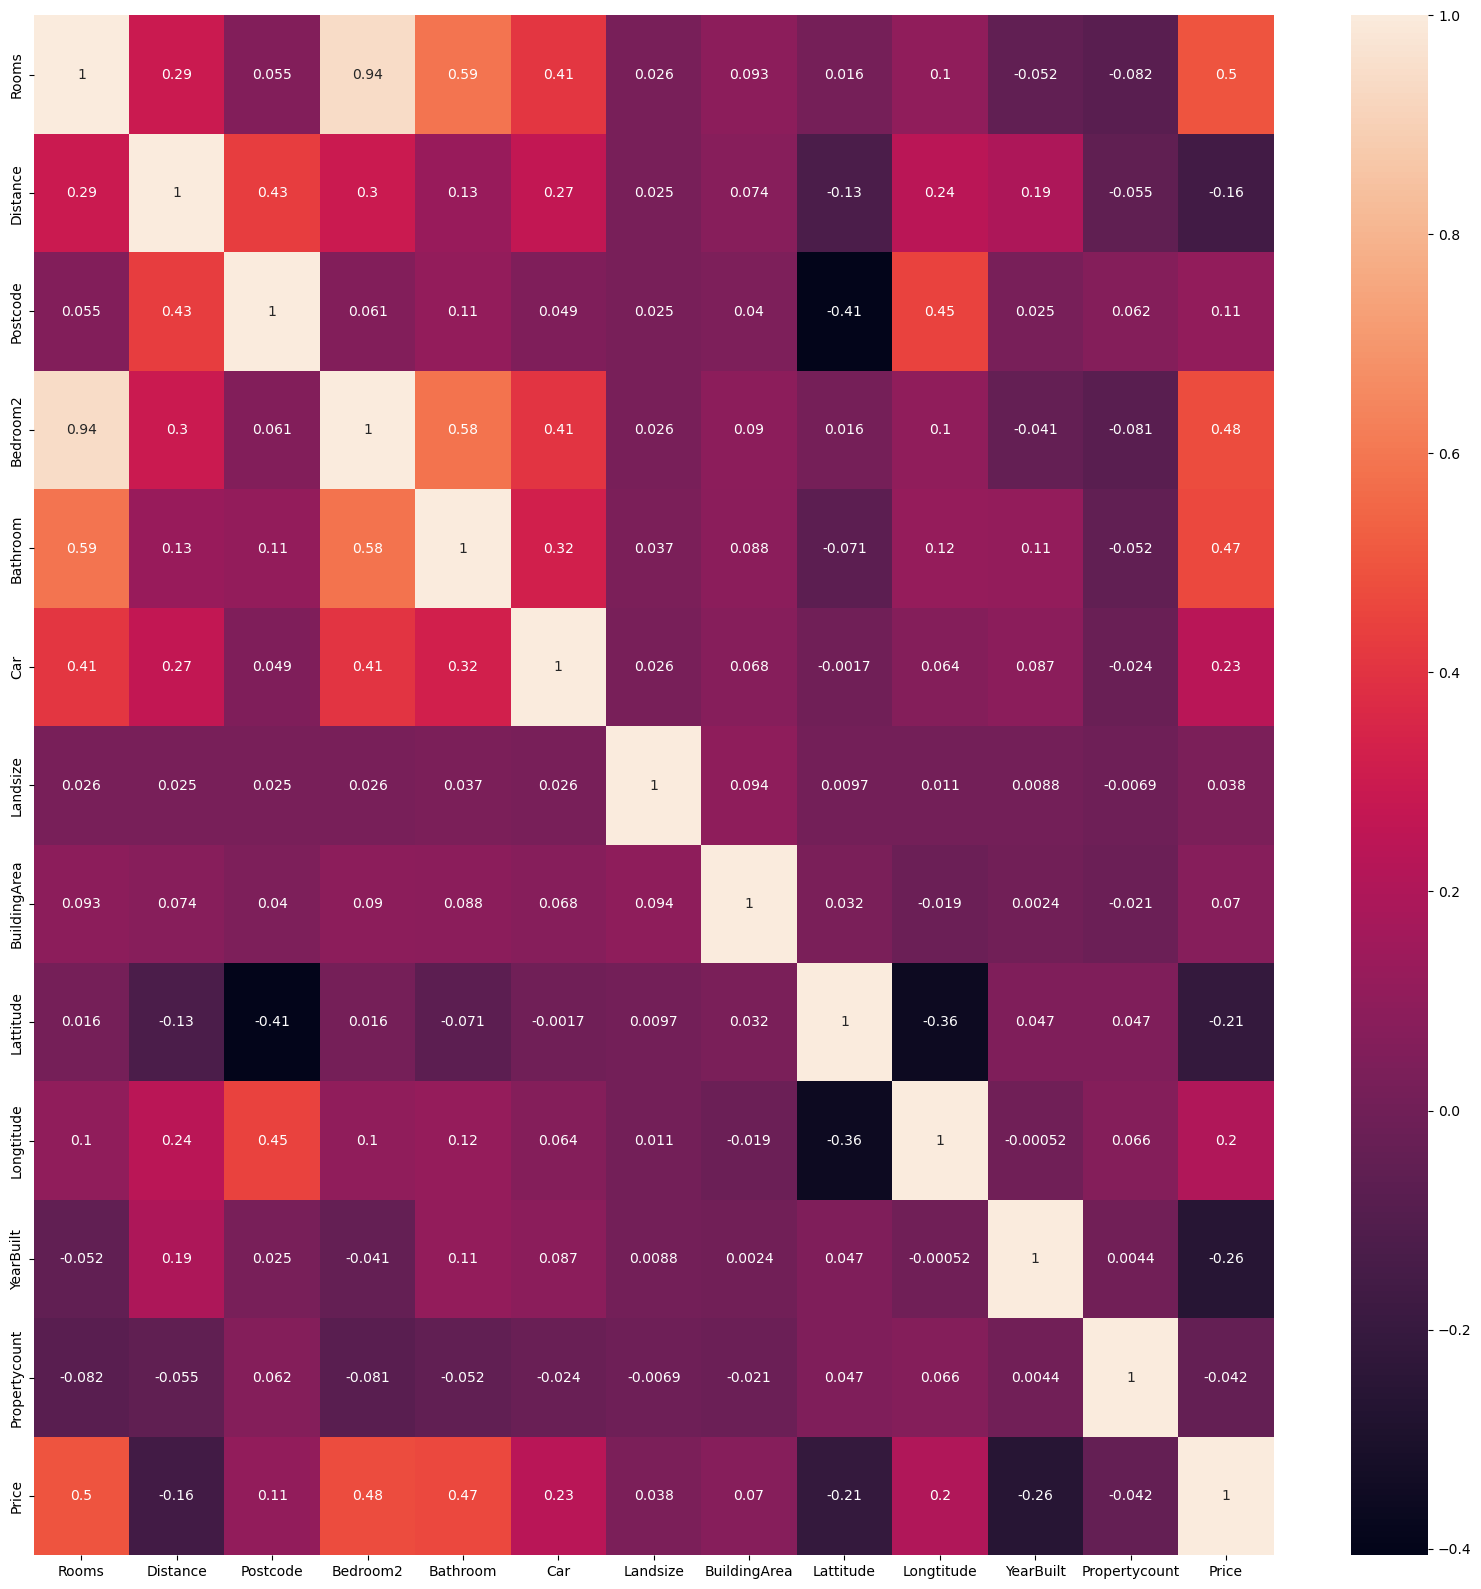

In [23]:
# Melakukan plot temp_numeric_cols kedalam heatmap
plt.figure(figsize=(20,20)) #mengatur ukuran figure
sns.heatmap(df[cols_num].corr(method='pearson'),annot=True)

`INSIGHT`:

Threshold yang kami gunakan adalah 0.03 . Artinya saya akan mengambil kolom dengan korelasi yang < -0.03 dan > 0.03 terhadap kolom price.

Dari Heatmap correlation dapat dilihat yang korelasinya cukup besar dengan harga rumah adalah :
- Rooms
- Distance
- Bedroom2
- Bathroom
- Car
- Landsize
- YearBuilt
- BuildingArea

#### Categorical Column

In [24]:
nilai = []

for kolom in cols_cat:
    kendall_corr, p_value = stats.kendalltau(df['Price'], df[kolom])
    nilai.append((kolom, kendall_corr, p_value))

for i in nilai:
    kolom, kendall_corr, p_value = i
    print(f'{kolom}: \nKorelasi Kendall: {kendall_corr}\nP-value: {p_value}\n')

Suburb: 
Korelasi Kendall: -0.09558001346599293
P-value: 5.072341924864206e-62

Type: 
Korelasi Kendall: -0.4242524900450961
P-value: 0.0

Regionname: 
Korelasi Kendall: -0.008002296253473621
P-value: 0.2115616249971648

Method: 
Korelasi Kendall: -0.055993710137258665
P-value: 3.5994260831017124e-17

SellerG: 
Korelasi Kendall: -0.03617441500929517
P-value: 6.698442424774521e-10

CouncilArea: 
Korelasi Kendall: -0.04000359197156722
P-value: 1.4913546394626992e-11



`INSIGHT`:

Dari hasil korelasi kolom kategorikal dengan target 'Price' dipilih beberapa feature dengan korelasi tertinggi :

- Type memiliki korelasi Kendall dengan nilai -0.4242524900450961, yang merupakan korelasi paling tinggi secara negatif.
- Method memiliki korelasi Kendall -0.055993710137258665 dengan p-value sekitar 3.5994260831017124e-17.

#### Kesimpulan

Feature yang dipilih untuk dimasukan kedalam model adalah :
1. Type (Kategorikal)
2. Method (Kategorikal)
3. Rooms (Numerikal)
4. Distance (Numerikal)
5. Bedroom2 (Numerikal)
6. Bathroom (Numerikal)
7. Car (Numerikal)
8. YearBuilt (Numerikal)
9. BuildingArea (Numerikal)

In [25]:
# Masukan feature selected kedalam dataframe baru
slc_after_corr = df[['Type', 'Method', 'Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'YearBuilt', 'BuildingArea','Price']]
slc_after_corr.head(5)

,Type,Method,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt,BuildingArea,Price
0,h,S,2,2.5,2,1,1,202.0,1970.0,126.0,1480000.0
1,h,S,2,2.5,2,1,0,156.0,1900.0,79.0,1035000.0
2,h,SP,3,2.5,3,2,0,134.0,1900.0,150.0,1465000.0
3,h,PI,3,2.5,3,2,1,94.0,1970.0,126.0,850000.0
4,h,VB,4,2.5,3,1,2,120.0,2014.0,142.0,1600000.0


Berhasil membuat dataframe baru bernama slc_after_corr berisi feature-feature yang sudah dipilih berdasarkan nilai korelasi dengan kolom Price dan juga business knowledge.

### VIF

VIF (Variance Inflation Factor) digunakan dalam analisis regresi untuk menilai seberapa kuat korelasi antara variabel independen (predictor) dalam model regresi. VIF membantu dalam mendeteksi multikolinearitas, yaitu kondisi di mana dua atau lebih variabel independen saling terkorelasi satu sama lain.

VIF dihitung untuk setiap variabel dalam model regresi dan memberikan perkiraan seberapa banyak varians dari sebuah koefisien regresi ditingkatkan karena korelasi dengan variabel lain. Semakin tinggi nilai VIF, semakin tinggi tingkat multikolinearitas dalam variabel tersebut.

In [26]:
# Membuat fungsi untuk menghitung Variance Inflation Factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# saya tidak memasukan kolom name karena menggunakan metode one hot encoding

# Define kolom yang dibutuhkan
data_VIF = slc_after_corr[['Bedroom2','Bathroom','Distance', 'Car', 'Landsize', 'BuildingArea']]


# Check Multicolinearity in X

calc_vif(data_VIF)

,variables,VIF
0,Bedroom2,13.186242
1,Bathroom,8.931035
2,Distance,4.245401
3,Car,4.665894
4,Landsize,1.029815
5,BuildingArea,1.151101


In [29]:
# Masukan feature selected setelah dilakukan VIF kedalam dataframe baru
new_features_aftr_vif = slc_after_corr[['Type', 'Method', 'Bedroom2','Bathroom','Distance', 'Car', 'Landsize', 'BuildingArea', 'Price']]
new_features_aftr_vif.head(5)

,Type,Method,Bedroom2,Bathroom,Distance,Car,Landsize,BuildingArea,Price
0,h,S,2,1,2.5,1,202.0,126.0,1480000.0
1,h,S,2,1,2.5,0,156.0,79.0,1035000.0
2,h,SP,3,2,2.5,0,134.0,150.0,1465000.0
3,h,PI,3,2,2.5,1,94.0,126.0,850000.0
4,h,VB,3,1,2.5,2,120.0,142.0,1600000.0


## Split Data

In [30]:
# Membagi data hasil pemilihan feature kedalam X(feature) dan y(target)
X = new_features_aftr_vif.drop(['Price'], axis=1)
y = new_features_aftr_vif['Price']

In [31]:
# Memisahkan antara Data Train dan Data Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=20)

print('Train size', X_train.shape)
print('Test size', X_test.shape)
X_train.head()

Train size (9506, 8)
Test size (4074, 8)


,Type,Method,Bedroom2,Bathroom,Distance,Car,Landsize,BuildingArea
9520,u,S,2,1,7.2,1,0.0,87.0
6863,u,SP,2,1,1.5,1,0.0,126.0
708,h,S,3,1,13.0,1,576.0,127.0
8554,h,S,3,1,13.5,1,594.0,126.0
3,h,PI,3,2,2.5,1,94.0,126.0


In [32]:
# Membagi lagi data test dan train ke data kategorikal dan data numerikal

# Data train numerikal
X_train_num = X_train[['Distance', 'Car', 'Landsize', 'BuildingArea','Bedroom2','Bathroom']]

# Data test numerikal
X_test_num = X_test[['Distance', 'Car', 'Landsize', 'BuildingArea','Bedroom2','Bathroom']]
X_test_num.head()

,Distance,Car,Landsize,BuildingArea,Bedroom2,Bathroom
4160,14.6,1,318.0,242.0,4,2
4963,8.8,2,227.0,126.0,3,2
9008,9.4,1,402.0,126.0,3,1
9036,17.3,2,947.0,126.0,5,3
9781,4.3,2,239.0,126.0,3,2


In [33]:
# Data train categorical
X_train_cat = X_train[['Type', 'Method']]

# Data test categorical
X_test_cat = X_test[['Type', 'Method']]

X_train_cat.head()

,Type,Method
9520,u,S
6863,u,SP
708,h,S
8554,h,S
3,h,PI


## Cek Distribusi Normal atau Skewness

In [34]:
# For loop untuk melihat nilai skew dari semua kolom di X_train_num
for i in X_train_num:
    skew = X_train_num[i].skew()
    print('Skewness of column', i, 'is', skew)

Skewness of column Distance is 1.6860354012422436
Skewness of column Car is 1.349071455453829
Skewness of column Landsize is 33.645573801263936
Skewness of column BuildingArea is 37.17569736079715
Skewness of column Bedroom2 is 0.4292948232009099
Skewness of column Bathroom is 1.4076155596893787


Dari nilai skewness tersebut , lihat mana yang terdistribusi normal dan mana yang skewed.

In [35]:
normal = []  # untuk menampung kolom yang masuk dalam skewness normal
skewed = []  # untuk menampung kolom yang masuk dalam skewness skewed

for column in X_train_num.columns:  # untuk mencari kolom mana yang skewed atau normal
    skewness = X_train_num[column].skew()
    if skewness < -0.5 or skewness > 0.5:  # syarat
        skewed.append(column)  # masuk ke variabel penampung skewed
    elif skewness >= -0.5 or skewness <= 0.5:  # syarat
        normal.append(column)  # masuk ke variabel penampung normal

In [36]:
print (f'Kolom yang termasuk distribusi normal adalah {normal}')
print (f'Kolom yang termasuk distribusi skewed adalah {skewed}')

Kolom yang termasuk distribusi normal adalah ['Bedroom2']
Kolom yang termasuk distribusi skewed adalah ['Distance', 'Car', 'Landsize', 'BuildingArea', 'Bathroom']


Melihat jumlah outlier pada setiap kolom di X_train_num

In [37]:
threshold = 3

outlier_counts = {}

for col in X_train_num.columns:
    data_skew = X_train_num[col]
    mean = np.mean(data_skew)
    std_dev = np.std(data_skew)

    upper_bound = mean + threshold * std_dev
    lower_bound = mean - threshold * std_dev

    outliers = np.where((data_skew > upper_bound) | (data_skew < lower_bound))
    
    outlier_counts[col] = len(outliers[0])

for col, count in outlier_counts.items():
    print(f"Jumlah outlier dalam kolom {col}: {count} outlier")

Jumlah outlier dalam kolom Distance: 173 outlier
Jumlah outlier dalam kolom Car: 96 outlier
Jumlah outlier dalam kolom Landsize: 42 outlier
Jumlah outlier dalam kolom BuildingArea: 61 outlier
Jumlah outlier dalam kolom Bedroom2: 69 outlier
Jumlah outlier dalam kolom Bathroom: 94 outlier


Melihat persentase outlier pada kolom X_train_num

In [38]:
# Set the threshold for identifying outliers
threshold = 3

# Initialize a dictionary to store outlier percentages for each numerical column
outlier_percentages = {}

# Iterate through each column in X_train_num
for col in X_train_num.columns:
    data_skew = X_train_num[col]
    mean = np.mean(data_skew)
    std_dev = np.std(data_skew)

    upper_bound = mean + threshold * std_dev
    lower_bound = mean - threshold * std_dev

    # Identify outliers based on the threshold
    outliers = np.where((data_skew > upper_bound) | (data_skew < lower_bound))
    
    # Calculate the percentage of outliers
    total_data_points = len(data_skew)
    percentage = (len(outliers[0]) / total_data_points) * 100
    
    # Store the percentage of outliers in the dictionary
    outlier_percentages[col] = percentage

# Print the percentage of outliers for each column
for col, percentage in outlier_percentages.items():
    print(f"Percentage of outliers in column {col}: {percentage:.2f}%")

Percentage of outliers in column Distance: 1.82%
Percentage of outliers in column Car: 1.01%
Percentage of outliers in column Landsize: 0.44%
Percentage of outliers in column BuildingArea: 0.64%
Percentage of outliers in column Bedroom2: 0.73%
Percentage of outliers in column Bathroom: 0.99%


Semua outlier persentasenya dibawah 5 % , namun karena jumlah data hanya sekitar 13.000an data, kami tidak melakukan trimming karena ada kemungkinan akan membuat model kami kekurangan data untuk belajar. Sebagai gantinya kami akan melakukan capping dengan metode Gaussian untuk kolom 'Bedroom2' dan 'Bathroom' , dan menggunakan metode IQR untuk kolom 'Distance', 'Car', 'Landsize', dan 'BuildingArea' di proses pipeline.

## Pipeline Preprocessing

Pipeline adalah salah satu fitur yang sangat berguna dalam scikit-learn di Python yang memungkinkan pengguna untuk menggabungkan beberapa tahapan pemrosesan data (seperti normalisasi, reduksi dimensi, dll.) dan model pembelajaran mesin (seperti regresi, klasifikasi, dll.) menjadi satu alur kerja yang dapat dieksekusi dengan mudah.

### Memasukan langkah-langkah yang akan digunakan pada preprocessing menggunakan `pipeline`

In [39]:
# define kolom numerik yang akan di proses pada numerik features
numeric_features = ['Distance', 'Car', 'Landsize', 'BuildingArea', 'Bathroom','Bedroom2']

# membuat numeric transformer pipeline
numeric_transformer = Pipeline(
    steps=[
        ('winsorizer Gaussian', Winsorizer(capping_method='gaussian', tail='both', fold=1.5, variables=['Bedroom2','Bathroom'])),
        ('winsorizer iqr', Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['Distance', 'Car', 'Landsize', 'BuildingArea'])), 
        ('scaler', StandardScaler())
    ]
)

# Define categorical features
categorical_features = ['Type', 'Method']

# ordinal transformer pipeline
categorical_transformer = Pipeline([
        (('onehot', OneHotEncoder(handle_unknown='ignore')))
    ]
)

### Menyatukan semua transformer menjadi column transformer dan dimasukan ke variabel bernama preprocessor

In [40]:
#ColumnTransformer for preprocessing
preprocessor = ColumnTransformer([
        ('Numerical', numeric_transformer, numeric_features),
        ('Categorical', categorical_transformer, categorical_features)
    ])

preprocessor

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('winsorizer Gaussian',
                                                  Winsorizer(fold=1.5,
                                                             tail='both',
                                                             variables=['Bedroom2',
                                                                        'Bathroom'])),
                                                 ('winsorizer iqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Distance',
                                                                        'Car',
                                                                        'Landsize',
                                                                        'BuildingArea'])),
                                                 ('scaler', StandardScaler())]),
                                 ['Distance', 'Car', 'Landsize', 'BuildingArea',
                                  'Bathroom', 'Bedroom2']),
                                ('Categorical',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Type', 'Method'])])

Berhasil untuk membuat pipeline Column Transformer untuk preprocessing, Prosesnya adalah untuk data numerikal akan dilakukan capping gaussian dan iqr(sesuai dengan jenis distribusi datanya), setelah itu dilakukan scaling menggunakan Standar scaler. Untuk Kolom Kategorikal dilakukan one hot encoder pada kolom kategorikal

# Model Definition

Pada tahap kali ini kami akan menggunakan 6 model:
- KNN Regressor
- SVR (Support Vector Reggresor)
- DecisionTree Regressor
- RandomForest Regressor
- AdaBoost Regressor
- Linear Regression

## Membuat pipeline untuk masing-masing model

In [32]:
#pipeline untuk linear regression
pipe_linreg = Pipeline([
    ('transormer', preprocessor),
    ('regressor', LinearRegression())
])

#pipeline untuk KNN
pipe_knn = Pipeline([
    ('transormer', preprocessor),
    ('regressor', KNeighborsRegressor())
])

#pipeline untuk decision tree regressor
pipe_dtr = Pipeline([
    ('transormer', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

#pipeline untuk adaboost regressor
pipe_abr = Pipeline([
    ('transormer', preprocessor),
    ('regressor', AdaBoostRegressor())
])

#pipeline untuk random forest regressor
pipe_rfr = Pipeline([
    ('transormer', preprocessor),
    ('regressor', RandomForestRegressor())
])

#pipeline untuk support vectore regressor
pipe_svr = Pipeline([
    ('transormer', preprocessor),
    ('regressor', SVR() )
])

#pipeline untuk SGD Regressor
pipe_sgd = Pipeline([
    ('transormer', preprocessor),
    ('regressor', SGDRegressor() )
])

## Base Model Evaluation

### 1. Linear Regression

In [33]:
#melihat pipeline untuk linear regression
pipe_linreg

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(fold=1.5,
                                                                              tail='both',
                                                                              variables=['Bedroom2',
                                                                                         'Bathroom'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Distance',
                                                                                         'Car',
                                                                                         'Landsize',
                                                                                         'BuildingArea'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Distance', 'Car',
                                                   'Landsize', 'BuildingArea',
                                                   'Bathroom', 'Bedroom2']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Method'])])),
                ('regressor', LinearRegression())])

In [34]:
pipe_linreg.fit(X_train,y_train)

y_train_linreg = pipe_linreg.predict(X_train)
y_test_linreg = pipe_linreg.predict(X_test)

print (pipe_linreg.score(X_train,y_train))
print(pipe_linreg.score(X_test,y_test))


0.4561287714779212
0.4660356399718273


### 2. KNN

In [35]:
pipe_knn

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(fold=1.5,
                                                                              tail='both',
                                                                              variables=['Bedroom2',
                                                                                         'Bathroom'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Distance',
                                                                                         'Car',
                                                                                         'Landsize',
                                                                                         'BuildingArea'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Distance', 'Car',
                                                   'Landsize', 'BuildingArea',
                                                   'Bathroom', 'Bedroom2']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Method'])])),
                ('regressor', KNeighborsRegressor())])

In [36]:
pipe_knn.fit(X_train,y_train)

y_train_knn = pipe_knn.predict(X_train)
y_test_knn = pipe_knn.predict(X_test)

print (pipe_knn.score(X_train,y_train))
print(pipe_knn.score(X_test,y_test))


0.6647895144354131
0.5309608613597498


### 3. Decission Tree

In [37]:
pipe_dtr

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(fold=1.5,
                                                                              tail='both',
                                                                              variables=['Bedroom2',
                                                                                         'Bathroom'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Distance',
                                                                                         'Car',
                                                                                         'Landsize',
                                                                                         'BuildingArea'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Distance', 'Car',
                                                   'Landsize', 'BuildingArea',
                                                   'Bathroom', 'Bedroom2']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Method'])])),
                ('regressor', DecisionTreeRegressor())])

In [38]:
pipe_dtr.fit(X_train,y_train)

y_train_dtr = pipe_dtr.predict(X_train)
y_test_dtr = pipe_dtr.predict(X_test)

print (pipe_dtr.score(X_train,y_train))
print(pipe_dtr.score(X_test,y_test))


0.998203377942423
0.259328939384737


### 4. ADA Boost Regressor

In [39]:
pipe_abr

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(fold=1.5,
                                                                              tail='both',
                                                                              variables=['Bedroom2',
                                                                                         'Bathroom'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Distance',
                                                                                         'Car',
                                                                                         'Landsize',
                                                                                         'BuildingArea'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Distance', 'Car',
                                                   'Landsize', 'BuildingArea',
                                                   'Bathroom', 'Bedroom2']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Method'])])),
                ('regressor', AdaBoostRegressor())])

In [40]:
pipe_abr.fit(X_train,y_train)

y_train_abr = pipe_abr.predict(X_train)
y_test_abr = pipe_abr.predict(X_test)

print (pipe_abr.score(X_train,y_train))
print(pipe_abr.score(X_test,y_test))


-0.26070628267835394
-0.2828083092993412


### 5. Random Forest Regressor

In [41]:
pipe_rfr

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(fold=1.5,
                                                                              tail='both',
                                                                              variables=['Bedroom2',
                                                                                         'Bathroom'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Distance',
                                                                                         'Car',
                                                                                         'Landsize',
                                                                                         'BuildingArea'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Distance', 'Car',
                                                   'Landsize', 'BuildingArea',
                                                   'Bathroom', 'Bedroom2']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Method'])])),
                ('regressor', RandomForestRegressor())])

In [42]:
pipe_rfr.fit(X_train,y_train)

y_train_rfr = pipe_rfr.predict(X_train)
y_test_rfr = pipe_rfr.predict(X_test)

print (pipe_rfr.score(X_train,y_train))
print(pipe_rfr.score(X_test,y_test))


0.9439114621462129
0.6354544304659805


### 6. SVR

In [43]:
pipe_svr

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(fold=1.5,
                                                                              tail='both',
                                                                              variables=['Bedroom2',
                                                                                         'Bathroom'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Distance',
                                                                                         'Car',
                                                                                         'Landsize',
                                                                                         'BuildingArea'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Distance', 'Car',
                                                   'Landsize', 'BuildingArea',
                                                   'Bathroom', 'Bedroom2']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Method'])])),
                ('regressor', SVR())])

In [44]:
pipe_svr.fit(X_train,y_train)

y_train_svr = pipe_svr.predict(X_train)
y_test_svr = pipe_svr.predict(X_test)

print (pipe_svr.score(X_train,y_train))
print(pipe_svr.score(X_test,y_test))


-0.07190262344693821
-0.06479689964438795


### 7. SGD Regressor

In [45]:
pipe_sgd

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(fold=1.5,
                                                                              tail='both',
                                                                              variables=['Bedroom2',
                                                                                         'Bathroom'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Distance',
                                                                                         'Car',
                                                                                         'Landsize',
                                                                                         'BuildingArea'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Distance', 'Car',
                                                   'Landsize', 'BuildingArea',
                                                   'Bathroom', 'Bedroom2']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Method'])])),
                ('regressor', SGDRegressor())])

In [46]:
pipe_sgd.fit(X_train,y_train)

y_train_sgd = pipe_sgd.predict(X_train)
y_test_sgd = pipe_sgd.predict(X_test)

print (pipe_sgd.score(X_train,y_train))
print(pipe_sgd.score(X_test,y_test))


0.45552070309797854
0.4649442183645376


## Cross Validation

Cross-validation adalah teknik evaluasi model yang umum digunakan dalam machine learning. Tujuannya adalah untuk mengukur seberapa baik kinerja model dalam mengeneralisasi data yang belum pernah dilihat sebelumnya. Ini dilakukan dengan membagi data menjadi subset yang saling terpisah untuk pelatihan dan pengujian.

### 1. Cross Validation Linear Regression

In [47]:
r2_train_cross_val_linreg = cross_val_score(pipe_linreg,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation Linear Regression ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_linreg)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_linreg.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_linreg.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_linreg.mean()-r2_train_cross_val_linreg.std()) , '-', (r2_train_cross_val_linreg.mean()+r2_train_cross_val_linreg.std()))

----Cross Validation Linear Regression ---- 
r2 Score - All - Cross Validation  :  [0.45669128 0.46687043 0.42485989 0.4566042  0.4667493 ]
r2 Score - Mean - Cross Validation :  0.4543550202948124
r2 Score - Std - Cross Validation  :  0.015432001928529821
r2 Score - Range of Test-Set       :  0.43892301836628256 - 0.46978702222334223


### 2. Cross Validation KNN

In [48]:
r2_train_cross_val_knn = cross_val_score(pipe_knn,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation KNN ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_knn)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_knn.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_knn.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_knn.mean()-r2_train_cross_val_knn.std()) , '-', (r2_train_cross_val_knn.mean()+r2_train_cross_val_knn.std()))

----Cross Validation KNN ---- 
r2 Score - All - Cross Validation  :  [0.46658844 0.52287241 0.46954215 0.48297544 0.50746092]
r2 Score - Mean - Cross Validation :  0.48988787130833933
r2 Score - Std - Cross Validation  :  0.0219152240062251
r2 Score - Range of Test-Set       :  0.46797264730211424 - 0.5118030953145645


### 3. Cross Validation Decission Tree

In [49]:
r2_train_cross_val_dtr = cross_val_score(pipe_dtr,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation Decission Tree ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_dtr)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_dtr.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_dtr.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_dtr.mean()-r2_train_cross_val_dtr.std()) , '-', (r2_train_cross_val_dtr.mean()+r2_train_cross_val_dtr.std()))

----Cross Validation Decission Tree ---- 
r2 Score - All - Cross Validation  :  [0.25314912 0.18530774 0.23874907 0.07919877 0.21199516]
r2 Score - Mean - Cross Validation :  0.19367997302728998
r2 Score - Std - Cross Validation  :  0.061772629260275276
r2 Score - Range of Test-Set       :  0.1319073437670147 - 0.2554526022875653


### 4. Cross Validation Ada Boost Regressor

In [50]:
r2_train_cross_val_abr = cross_val_score(pipe_abr,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation Ada Boost Regressor ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_abr)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_abr.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_abr.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_abr.mean()-r2_train_cross_val_abr.std()) , '-', (r2_train_cross_val_abr.mean()+r2_train_cross_val_abr.std()))

----Cross Validation Ada Boost Regressor ---- 
r2 Score - All - Cross Validation  :  [-0.35874124 -0.31930537  0.09852749 -0.21255179 -0.04109876]
r2 Score - Mean - Cross Validation :  -0.16663393530068807
r2 Score - Std - Cross Validation  :  0.17227413690175114
r2 Score - Range of Test-Set       :  -0.33890807220243924 - 0.005640201601063072


### 5. Cross Validation Random Forest Regressor

In [51]:
r2_train_cross_val_rfr = cross_val_score(pipe_rfr,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation Random Forest Regressor ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_rfr)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_rfr.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_rfr.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_rfr.mean()-r2_train_cross_val_rfr.std()) , '-', (r2_train_cross_val_rfr.mean()+r2_train_cross_val_rfr.std()))

----Cross Validation Random Forest Regressor ---- 
r2 Score - All - Cross Validation  :  [0.60255637 0.61204815 0.54999599 0.61784808 0.59746898]
r2 Score - Mean - Cross Validation :  0.5959835148020755
r2 Score - Std - Cross Validation  :  0.024068206712983705
r2 Score - Range of Test-Set       :  0.5719153080890917 - 0.6200517215150592


### 6. Cross Validation SVR

In [52]:
r2_train_cross_val_svr = cross_val_score(pipe_svr,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation SVR ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_svr)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_svr.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_svr.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_svr.mean()-r2_train_cross_val_svr.std()) , '-', (r2_train_cross_val_svr.mean()+r2_train_cross_val_svr.std()))

----Cross Validation SVR ---- 
r2 Score - All - Cross Validation  :  [-0.06586481 -0.06005275 -0.07731951 -0.07548755 -0.08097274]
r2 Score - Mean - Cross Validation :  -0.07193947184479202
r2 Score - Std - Cross Validation  :  0.007763109645750214
r2 Score - Range of Test-Set       :  -0.07970258149054224 - -0.0641763621990418


### 7. Cross Validation SGD Regressor

In [53]:
r2_train_cross_val_sgd = cross_val_score(pipe_sgd,
                                        X_train,
                                        y_train,
                                        cv=5,
                                        scoring="r2")

print('----Cross Validation SGD Regressor ---- ')
print('r2 Score - All - Cross Validation  : ', r2_train_cross_val_sgd)
print('r2 Score - Mean - Cross Validation : ', r2_train_cross_val_sgd.mean())
print('r2 Score - Std - Cross Validation  : ', r2_train_cross_val_sgd.std())
print('r2 Score - Range of Test-Set       : ', (r2_train_cross_val_sgd.mean()-r2_train_cross_val_sgd.std()) , '-', (r2_train_cross_val_sgd.mean()+r2_train_cross_val_sgd.std()))

----Cross Validation SGD Regressor ---- 
r2 Score - All - Cross Validation  :  [0.4554523  0.4620895  0.42623351 0.4552807  0.46783488]
r2 Score - Mean - Cross Validation :  0.453378177908652
r2 Score - Std - Cross Validation  :  0.014350174520756999
r2 Score - Range of Test-Set       :  0.439028003387895 - 0.46772835242940897


Setelah dilihat dari r2 Score dan standar deviasinya, saya memutuskan model paling baik yang tersedia untuk digunakan dalam model adalah menggunakan Random Forest Regressor.
Random Forest Regressor memiliki rata-rata r2 score sebesar 59% dari 5 jenis pembagian data. 

Random Forest Regressor adalah salah satu algoritma dalam machine learning yang digunakan untuk tugas regresi. Ini merupakan versi dari algoritma Random Forest yang digunakan untuk melakukan prediksi terhadap variabel kontinu (seperti prediksi harga, prediksi suhu, dsb).

# Model Training

## Hyperparameter Tunning

Hyperparameter tuning adalah proses mengoptimalkan parameter yang tidak bisa dipelajari (disebut hyperparameter) dalam suatu model machine learning untuk meningkatkan kinerja model tersebut. Perbedaan antara hyperparameter dengan parameter biasa adalah bahwa hyperparameter didefinisikan sebelum proses pelatihan model dan tidak berubah selama proses pelatihan.

Tujuan dari hyperparameter tuning adalah mencari kombinasi hyperparameter yang dapat menghasilkan model dengan performa terbaik, yang dapat diukur dengan metrik yang sesuai (misalnya akurasi, presisi, recall, R-squared, Mean Squared Error, dll.).

Menggunakan GridSearchCV untuk melakukan hyperparameter tuning, untuk parameter yang akan dilakukan tunning meliputi :
- n_estimators : Menentukan jumlah pohon dalam Random Forest.
- criterion : Menentukan kriteria untuk mengukur kualitas split.
- max_depth : Menentukan kedalaman maksimum setiap pohon dalam model.

In [54]:
#memasukan parameter apa saja yang akan dilakukan tunning
parameter_rfr = {
    'regressor__n_estimators': [100, 150, 200],  
    'regressor__criterion': ['mse', 'mae', 'friedman_mse', 'poisson'],  
    'regressor__max_depth': [10, 50, 100]  
}

#mencari parameter terbaik dari Random Forest regressor, dan memasukan parameter yang sudah dibuat sebelumnya
model_rfr = GridSearchCV(pipe_rfr, parameter_rfr, cv=3, verbose=1)

Melakukan Train pada Model Random Forest Regressor

In [55]:
model_rfr.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimato

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transormer',
                                        ColumnTransformer(transformers=[('Numerical',
                                                                         Pipeline(steps=[('winsorizer '
                                                                                          'Gaussian',
                                                                                          Winsorizer(fold=1.5,
                                                                                                     tail='both',
                                                                                                     variables=['Bedroom2',
                                                                                                                'Bathroom'])),
                                                                                         ('winsorizer '
                                                                                          'iqr',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     fold=1.5,
                                                                                                     tail='both',
                                                                                                     variables=['Distance',
                                                                                                                'Car',
                                                                                                                'Landsize',
                                                                                                                'BuildingArea'])),
                                                                                         ('scaler',...
                                                                          'Landsize',
                                                                          'BuildingArea',
                                                                          'Bathroom',
                                                                          'Bedroom2']),
                                                                        ('Categorical',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Type',
                                                                          'Method'])])),
                                       ('regressor', RandomForestRegressor())]),
             param_grid={'regressor__criterion': ['mse', 'mae', 'friedman_mse',
                                                  'poisson'],
                         'regressor__max_depth': [10, 50, 100],
                         'regressor__n_estimators': [100, 150, 200]},
             verbose=1)

Melihat nilai rata-rata dari hasil pencarian hyperparameter

In [56]:
mean_score = model_rfr.best_score_
print(f"Nilai mean dari hasil pencarian hyperparameter adalah: {mean_score:.4f}")

Nilai mean dari hasil pencarian hyperparameter adalah: 0.5952


Melihat standar deviasi dari pencarian hyperparameter

In [57]:

# Mendapatkan nilai standar deviasi dari hasil pencarian hyperparameter
std_score = model_rfr.cv_results_['std_test_score'][model_rfr.best_index_]

print(f"Nilai standar deviasi dari hasil pencarian hyperparameter adalah: {std_score:.4f}")

Nilai standar deviasi dari hasil pencarian hyperparameter adalah: 0.0152


Melihat Parameter Terbaik yang didapatkan

In [58]:
print("Parameter Terbaik:", model_rfr.best_params_)

Parameter Terbaik: {'regressor__criterion': 'friedman_mse', 'regressor__max_depth': 10, 'regressor__n_estimators': 200}


`INSIGHT:`
- criterion terbaik adalah friedman_mse 
- max_depth terbaik adalah 10
- n_estimators terbaik adalah 200

Membuat variabel baru `model_rfr_best` untuk menyimpan hasil parameter terbaik

In [59]:
model_rfr_best = model_rfr.best_estimator_

## Train dengan Random Forest Regression menggunakan parameter terbaik

In [60]:
# Menggunakan model SVM terbaik untuk membuat prediksi
y_train_pred = model_rfr_best.predict(X_train)

# Evaluasi model SVM terbaik
r2_train_pred = r2_score(y_train, y_train_pred)

# Cetak hasil evaluasi
print("R2 Score Pada data Train:", r2_train_pred)

R2 Score Pada data Train: 0.7842577012734242


In [61]:
#menampilkan hasil data test dengan metode random search
y_test_pred = model_rfr.predict(X_test)

print('R2 Score pada Test  : ', r2_score(y_test, y_test_pred), '\n')


R2 Score pada Test  :  0.6239410190525709 



# Model Evaluation

## 1. Report SGD Regressor sebelum Hyperparameter Tuning

In [62]:
all_reports = {}  # Dictionary untuk menyimpan laporan kinerja

# Fungsi untuk membuat laporan kinerja
def performance_report(all_reports, y_test, y_test_rfr, y_train, y_train_rfr, name):
    score_reports = {
        'test - r2': r2_score(y_test, y_test_rfr),
        'test - MAE': mean_absolute_error(y_test, y_test_rfr),
        'test - MSE': mean_squared_error(y_test, y_test_rfr),
        'test - RMSE': np.sqrt(mean_squared_error(y_test, y_test_rfr)),
        'train - r2': r2_score(y_train,y_train_rfr),
        'train - MAE': mean_absolute_error(y_train,y_train_rfr),
        'train - MSE': mean_squared_error(y_train,y_train_rfr),
        'train - RMSE': np.sqrt(mean_squared_error(y_train,y_train_rfr))
    }
    all_reports[name] = score_reports
    return all_reports

# Memanggil fungsi 
reports_default = performance_report(all_reports,y_test, y_test_rfr, y_train, y_train_rfr, 'Model Default Random Forest Regressor')
 
# Menampilkan laporan kinerja dalam bentuk DataFrame
pd.DataFrame(reports_default)

,Model Default Random Forest Regressor
test - MAE,2.515296e+05
test - MSE,1.502480e+11
test - RMSE,3.876184e+05
test - r2,6.354544e-01
train - MAE,9.699833e+04
train - MSE,2.283849e+10
train - RMSE,1.511241e+05
train - r2,9.439115e-01


## 2. Report Setelah Hyperparameter Tuning

In [63]:
# Memanggil fungsi 
reports_default = performance_report(all_reports,y_test, y_test_pred,y_train,y_train_pred, 'Model Random Forest Regressor Hasil Hyper Parameter Tuning')

# Menampilkan laporan kinerja dalam bentuk DataFrame
pd.DataFrame(reports_default)

,Model Default Random Forest Regressor,Model Random Forest Regressor Hasil Hyper Parameter Tuning
test - r2,6.354544e-01,6.239410e-01
test - MAE,2.515296e+05,2.613513e+05
test - MSE,1.502480e+11,1.549933e+11
test - RMSE,3.876184e+05,3.936919e+05
train - r2,9.439115e-01,7.842577e-01
train - MAE,9.699833e+04,2.066900e+05
train - MSE,2.283849e+10,8.784732e+10
train - RMSE,1.511241e+05,2.963905e+05


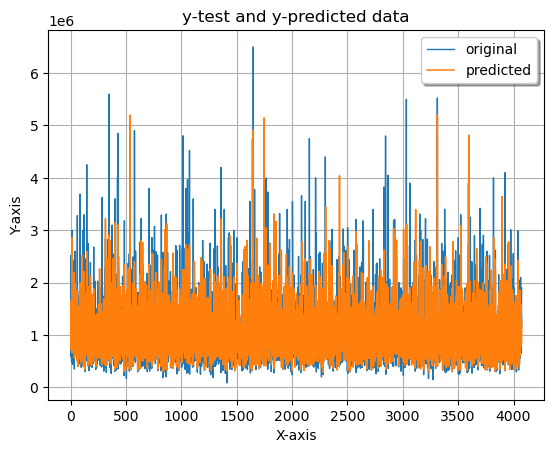

In [64]:
#plot data asli dan hasil prediksi
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_test_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

## 3. Kesimpulan Model Evaluation

1. Penurunan Performa pada Test Set Setelah Hyperparameter Tuning:

- R^2 pada data uji mengalami penurunan kecil setelah tuning.
- Metrics MAE, MSE, dan RMSE pada data uji menunjukkan peningkatan yang menandakan prediksi yang kurang akurat.

2. Penurunan Overfitting:
- Setelah tuning, model mengalami peningkatan dalam generalisasi (penurunan overfitting) karena terdapat peningkatan pada metrics pada data latih dan pengurangan perbedaan antara data latih dan uji.

3. Kinerja Default Model:
- Model default cenderung lebih baik dalam memprediksi data latih (tinggi R^2 dan rendahnya error metrics), namun kemungkinan overfitting pada data uji.

4. Kinerja Setelah Hyperparameter Tuning:
- Terjadi peningkatan pada generalisasi model, namun performa pada data uji menunjukkan sedikit penurunan yang menandakan tuning mungkin belum mengoptimalkan model secara keseluruhan.

5. Diperlukan Evaluasi Lebih Lanjut:
- Diperlukan evaluasi lebih lanjut, mungkin dengan eksplorasi hyperparameter lain atau teknik tuning yang berbeda untuk memperbaiki performa model.


Kesimpulannya, walaupun ada penurunan kecil pada performa model pada data uji setelah hyperparameter tuning, tuning telah membantu mengurangi overfitting pada data latih, memberikan peluang untuk meningkatkan generalisasi model, tetapi perlu diakui bahwa hasilnya masih perlu perbaikan lebih lanjut untuk memperbaiki performa pada data uji.

# Model Saving

In [65]:
pipe_rfr

Pipeline(steps=[('transormer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('winsorizer '
                                                                   'Gaussian',
                                                                   Winsorizer(fold=1.5,
                                                                              tail='both',
                                                                              variables=['Bedroom2',
                                                                                         'Bathroom'])),
                                                                  ('winsorizer '
                                                                   'iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Distance',
                                                                                         'Car',
                                                                                         'Landsize',
                                                                                         'BuildingArea'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Distance', 'Car',
                                                   'Landsize', 'BuildingArea',
                                                   'Bathroom', 'Bedroom2']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Method'])])),
                ('regressor', RandomForestRegressor())])

In [84]:
# Menyimpan model menggunakan pickle
with open('final_pipeline1.pkl', 'wb') as file:
  pickle.dump((pipe_rfr), file)

with open('best_model.pkl', 'wb') as file_1:
  pickle.dump(model_rfr_best, file_1)